In [1]:
from gensim import models
import numpy as np
import pandas as pd

import gensim, logging
from gensim import corpora

from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

# Import Data

In [2]:
df = pd.read_csv('questions-words2.txt', sep=' ', skiprows=1)

In [3]:
df.columns = ["first","second","third","fourth"]
df = df.dropna(how='any',axis=0) 
df.head()

,first,second,third,fourth
0,Athens,Greece,Bangkok,Thailand
1,Athens,Greece,Beijing,China
2,Athens,Greece,Berlin,Germany
3,Athens,Greece,Bern,Switzerland
4,Athens,Greece,Cairo,Egypt


In [4]:
print(df.to_string())

              first          second         third          fourth
0            Athens          Greece       Bangkok        Thailand
1            Athens          Greece       Beijing           China
2            Athens          Greece        Berlin         Germany
3            Athens          Greece          Bern     Switzerland
4            Athens          Greece         Cairo           Egypt
5            Athens          Greece      Canberra       Australia
6            Athens          Greece         Hanoi         Vietnam
7            Athens          Greece        Havana            Cuba
8            Athens          Greece      Helsinki         Finland
9            Athens          Greece     Islamabad        Pakistan
10           Athens          Greece         Kabul     Afghanistan
11           Athens          Greece        London         England
12           Athens          Greece        Madrid           Spain
13           Athens          Greece        Moscow          Russia
14        

### Verify Null values

In [18]:
np.where(pd.isnull(df))

(array([], dtype=int64), array([], dtype=int64))

# Transform Data to Array


In [5]:
#Create an empty list 
row_list = [] 
  
# Iterate over each row 
for index, rows in df.iterrows(): 
    # Create list for the current row 
    my_list =[ rows['first'].upper(), rows['second'].upper(), rows['third'].upper(), rows['fourth'].upper() ]
      
    # append the list to the final list 
    row_list.append(my_list) 

  ## Create a dictionary

In [7]:
gensim_dictionary = corpora.Dictionary(row_list)

In [8]:
print("The dictionary has: " +str(len(gensim_dictionary)) + " tokens")

for k, v in gensim_dictionary.token2id.items():
    print(f'{k:{15}} {v:{10}}')

The dictionary has: 905 tokens
ATHENS                   0
BANGKOK                  1
GREECE                   2
THAILAND                 3
BEIJING                  4
CHINA                    5
BERLIN                   6
GERMANY                  7
BERN                     8
SWITZERLAND              9
CAIRO                   10
EGYPT                   11
AUSTRALIA               12
CANBERRA                13
HANOI                   14
VIETNAM                 15
CUBA                    16
HAVANA                  17
FINLAND                 18
HELSINKI                19
ISLAMABAD               20
PAKISTAN                21
AFGHANISTAN             22
KABUL                   23
ENGLAND                 24
LONDON                  25
MADRID                  26
SPAIN                   27
MOSCOW                  28
RUSSIA                  29
NORWAY                  30
OSLO                    31
CANADA                  32
OTTAWA                  33
FRANCE                  34
PARIS                   

# Generate Word Embbedings

### TRAIN

In [9]:
# train word2vec on the two sentences
model = gensim.models.Word2Vec(row_list, min_count=5,  window=3)

### FIT

In [12]:
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


### Plot word cloud

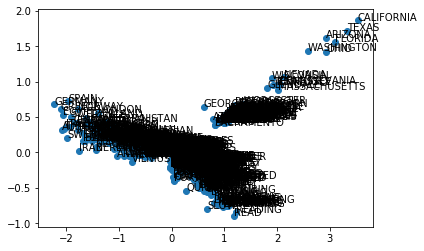

In [13]:
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [ ]:
###

In [14]:
model.accuracy('questions-words2.txt')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `accuracy` (Method will be removed in 4.0.0, use self.wv.evaluate_word_analogies() instead).
  """Entry point for launching an IPython kernel.


[{'section': 'capital-common-countries',
  'correct': [('CAIRO', 'EGYPT', 'HELSINKI', 'FINLAND')],
  'incorrect': [('ATHENS', 'GREECE', 'BAGHDAD', 'IRAQ'),
   ('ATHENS', 'GREECE', 'BANGKOK', 'THAILAND'),
   ('ATHENS', 'GREECE', 'BEIJING', 'CHINA'),
   ('ATHENS', 'GREECE', 'BERLIN', 'GERMANY'),
   ('ATHENS', 'GREECE', 'BERN', 'SWITZERLAND'),
   ('ATHENS', 'GREECE', 'CAIRO', 'EGYPT'),
   ('ATHENS', 'GREECE', 'CANBERRA', 'AUSTRALIA'),
   ('ATHENS', 'GREECE', 'HANOI', 'VIETNAM'),
   ('ATHENS', 'GREECE', 'HAVANA', 'CUBA'),
   ('ATHENS', 'GREECE', 'HELSINKI', 'FINLAND'),
   ('ATHENS', 'GREECE', 'ISLAMABAD', 'PAKISTAN'),
   ('ATHENS', 'GREECE', 'KABUL', 'AFGHANISTAN'),
   ('ATHENS', 'GREECE', 'LONDON', 'ENGLAND'),
   ('ATHENS', 'GREECE', 'MADRID', 'SPAIN'),
   ('ATHENS', 'GREECE', 'MOSCOW', 'RUSSIA'),
   ('ATHENS', 'GREECE', 'OSLO', 'NORWAY'),
   ('ATHENS', 'GREECE', 'OTTAWA', 'CANADA'),
   ('ATHENS', 'GREECE', 'PARIS', 'FRANCE'),
   ('ATHENS', 'GREECE', 'ROME', 'ITALY'),
   ('ATHENS', 'GREEC

In [15]:
# model.most_similar("BAGHDAD", topn=1)
model.similar_by_word("SAY")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  


[('JUMP', 0.9772195816040039),
 ('WRITE', 0.9758971333503723),
 ('WALK', 0.975456714630127),
 ('THINKING', 0.9753575325012207),
 ('SCREAM', 0.9749284982681274),
 ('SLOWING', 0.9740973114967346),
 ('LOOKING', 0.9740906357765198),
 ('PLAY', 0.9739943742752075),
 ('SING', 0.9736661911010742),
 ('RUNNING', 0.9732221364974976)]

In [17]:
model.predict_output_word(['HAVANA','CUBA','HANOI'], topn=10)

[('VIETNAM', 0.0046450207),
 ('CUBA', 0.0040944987),
 ('FRANCE', 0.003642777),
 ('NORWAY', 0.0035088693),
 ('CROATIA', 0.0033409009),
 ('PAKISTAN', 0.0033271934),
 ('GREECE', 0.0032936875),
 ('AUSTRIA', 0.003279895),
 ('IRELAND', 0.0032689192),
 ('JAPAN', 0.003207823)]

# Import

# Traning SKIPGRAM

# Training CBOW

# Training LSTMs